In [1]:
# 資料權限
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)
#%cd /content/drive/My-Drive/

#匯入所需套件
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

# 在線GPU性能检验
!nvidia-smi 

Mounted at /content/gdrive/
Thu May 13 09:36:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    35W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                            

In [2]:
#匯入資料
raw = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/test8.csv')
raw['Date'] = pd.to_datetime(raw.Date, format = '%Y/%m/%d')

#read the data
stock = raw 
amount = len(stock) #總資料筆數
stock

,Date,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,2018-06-11,66.419998,62.356850,201.366592,139.268356,43.161572,35.760654,36.075409,29.904634,21.776939,91.941254
1,2018-06-12,68.554001,61.476101,204.039581,136.954926,42.667358,35.661705,39.682949,30.325052,21.423853,92.215569
2,2018-06-13,68.956001,62.444927,206.712601,138.805664,42.914463,35.008633,43.649250,29.952877,20.832191,91.884514
3,2018-06-14,71.543999,61.476101,201.812103,140.656418,42.667358,34.068604,48.014175,29.692720,20.994423,93.937096
4,2018-06-15,71.634003,61.476101,205.821594,142.969833,42.832092,33.504589,52.817585,29.118149,20.813103,93.643867
...,...,...,...,...,...,...,...,...,...,...,...
746,2021-04-26,738.200012,104.000000,610.000000,104.000000,54.200001,30.920000,349.000000,53.840000,27.290001,135.169998
747,2021-04-27,704.739990,106.000000,610.000000,103.500000,54.400002,31.129999,348.600006,54.119999,27.670000,135.149994
748,2021-04-28,694.400024,104.500000,602.000000,102.500000,54.799999,32.680000,367.029999,55.400002,27.709999,135.919998
749,2021-04-29,677.000000,106.000000,600.000000,103.500000,54.599998,31.950001,379.989990,56.290001,26.459999,138.179993


In [3]:
#設定資料之input variable (X) 與target variable (Y)。如以被預測日前ref_day天作為input variables，以被預測日做為target variable
def xy_set(dataset, ref_day):
    predict_day=1 #predict_day:被預測天數
    X = [[0 for i in range(ref_day)] for j in range(dataset.shape[0]-predict_day-ref_day)] #宣告輸入變數空集合
    Y = [0 for j in range(dataset.shape[0]-predict_day-ref_day)] #宣告被預測變數空集合
    for i in range(dataset.shape[0]-predict_day-ref_day):
        X[i] = dataset[i:i+ref_day,0] #前ref_day天資料
        Y[i] = dataset[i+ref_day:i+ref_day+predict_day,0] #第ref_day+1天資料
    return np.array(X),np.array(Y)

In [4]:
def show_train_history(train_history,train,validation):
   #train_history訓練過程；train訓練結果；validation驗證結果

      plt.plot(train_history.history[train]) #描繪訓練結果
      plt.plot(train_history.history[validation]) #描繪驗證結果
      plt.title('Train History') #圖標題
      plt.ylabel(train) #y軸標籤
      plt.xlabel('Epoch') #x軸標籤
      plt.legend(['train', 'validation'], loc='upper left') #設定訓練與驗證之圖例及位置
      plt.show()

In [5]:
## 預設參數
ref_day = 5 #ref_day:預測參照天數
d = 0.2
dim= stock.shape[1]#-1
%pylab inline
#讓圖形直接顯示於jupyter note

rdf= pd.DataFrame() #用于保存所有股票的预测价格

## 
from sklearn import preprocessing #使用sklearn的preprocessing的MinMaxScaler進行正規化:(x-min)/(max-min)

Populating the interactive namespace from numpy and matplotlib


In [6]:
def show_test_result(Real_data,Prediciton_data):
    plt.plot(Real_data, color="red", label="Real Stock Price") #描繪測試資料真實股價
    plt.plot(Prediciton_data, color="blue", label="Predicted Stock Price") #描繪測試資料預測股價
    plt.title('Stock Prediction')
    plt.ylabel('Price') 
    plt.xlabel('Time') 
    plt.legend()
    plt.show()

輸入變數維度 (439, 5, 1)
預測變數維度 (439,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.24267049]
 [0.2598145 ]
 [0.23505995]
 [0.24815494]
 [0.22823483]]
第Y個預測日之正規化股價
0.20943869113080396
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 256)            264192    
_________________________________________________________________
dropout (Dropout)            (None, 5, 256)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 256)            525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 256)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 256)            525312    
_________________________________________________________________
dropout_2 (Dropout)       

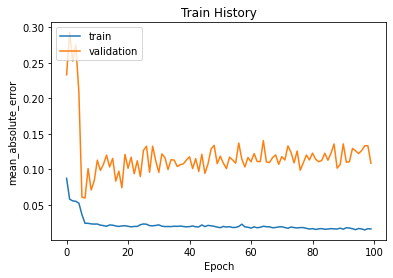

輸入變數維度 (300, 5, 1)
預測變數維度 (300,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.09478742]
 [0.09577156]
 [0.08961504]
 [0.08442046]
 [0.06086975]]
第Y個預測日之正規化股價
0.07007741212980408
10/10 [==============================] - 0s 9ms/step - loss: 0.1523 - mean_absolute_error: 0.1523


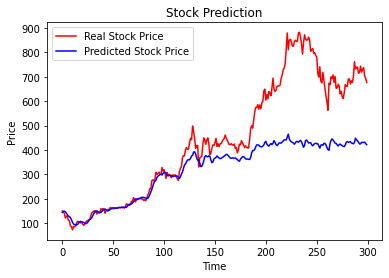

輸入變數維度 (439, 5, 1)
預測變數維度 (439,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.04567084]
 [0.04567084]
 [0.0349819 ]
 [0.02429296]
 [0.03886883]]
第Y個預測日之正規化股價
0.027208136372076752
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 5, 256)            264192    
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 256)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 5, 256)            525312    
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 256)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 5, 256)            525312    
_________________________________________________________________
dropout_7 (Dropout)    

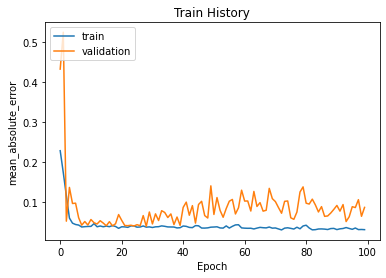

輸入變數維度 (300, 5, 1)
預測變數維度 (300,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.61165614]
 [0.61165614]
 [0.624399  ]
 [0.57979903]
 [0.49697057]]
第Y個預測日之正規化股價
0.49697057059665195
10/10 [==============================] - 0s 10ms/step - loss: 0.0518 - mean_absolute_error: 0.0518


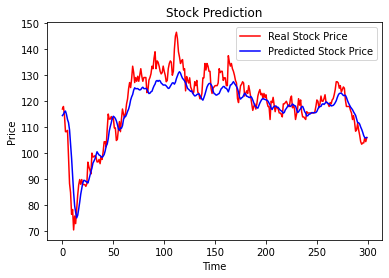

輸入變數維度 (439, 5, 1)
預測變數維度 (439,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.09607897]
 [0.09607897]
 [0.05869202]
 [0.0649233 ]
 [0.06803894]]
第Y個預測日之正規化股價
0.07426990459181737
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 5, 256)            264192    
_________________________________________________________________
dropout_10 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_11 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_12 (Dropout)    

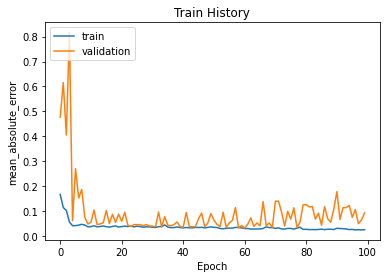

輸入變數維度 (300, 5, 1)
預測變數維度 (300,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.15189501]
 [0.15868693]
 [0.16434691]
 [0.1462351 ]
 [0.12472726]]
第Y個預測日之正規化股價
0.12812336466867447
10/10 [==============================] - 0s 10ms/step - loss: 0.0427 - mean_absolute_error: 0.0427


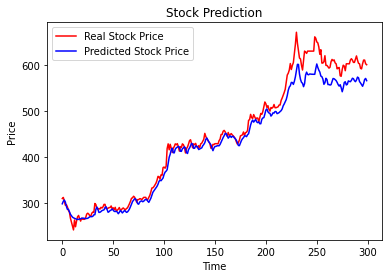

輸入變數維度 (439, 5, 1)
預測變數維度 (439,)
第Y個被預測日之前ref_day天每天正規化股價
[[1.        ]
 [1.        ]
 [0.93183226]
 [0.91668415]
 [0.91668415]]
第Y個預測日之正規化股價
0.8939612389856235
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 5, 256)            264192    
_________________________________________________________________
dropout_15 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_16 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_17 (Dropout)     

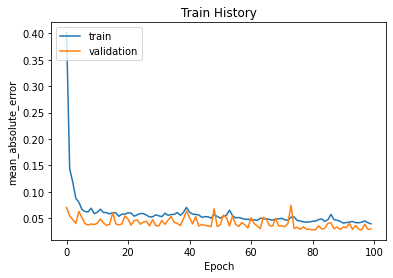

輸入變數維度 (300, 5, 1)
預測變數維度 (300,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.78008211]
 [0.71397345]
 [0.73876418]
 [0.68091905]
 [0.59001979]]
第Y個預測日之正規化股價
0.5734925961071273
10/10 [==============================] - 0s 10ms/step - loss: 0.0439 - mean_absolute_error: 0.0439


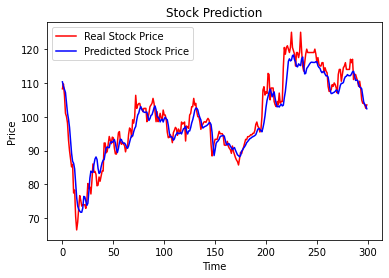

輸入變數維度 (439, 5, 1)
預測變數維度 (439,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.24460406]
 [0.24460406]
 [0.20409519]
 [0.20409519]
 [0.20409519]]
第Y個預測日之正規化股價
0.19059223829485994
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 5, 256)            264192    
_________________________________________________________________
dropout_20 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_21 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_22 (Dropout)    

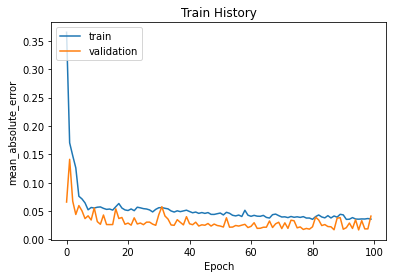

輸入變數維度 (300, 5, 1)
預測變數維度 (300,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.44335938]
 [0.4314305 ]
 [0.44335938]
 [0.4354069 ]
 [0.38769106]]
第Y個預測日之正規化股價
0.39961994116835475
10/10 [==============================] - 0s 10ms/step - loss: 0.0368 - mean_absolute_error: 0.0368


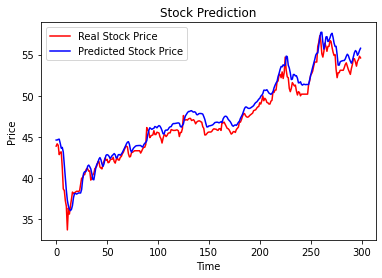

輸入變數維度 (439, 5, 1)
預測變數維度 (439,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.38529143]
 [0.38529143]
 [0.30309264]
 [0.29412111]
 [0.23835207]]
第Y個預測日之正規化股價
0.24950587675747465
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 5, 256)            264192    
_________________________________________________________________
dropout_25 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_26 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_27 (Dropout)    

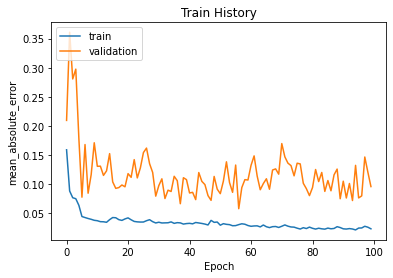

輸入變數維度 (300, 5, 1)
預測變數維度 (300,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.7384378 ]
 [0.74717377]
 [0.75128467]
 [0.74203491]
 [0.54008216]]
第Y個預測日之正規化股價
0.6813976847570096
10/10 [==============================] - 0s 10ms/step - loss: 0.0543 - mean_absolute_error: 0.0543


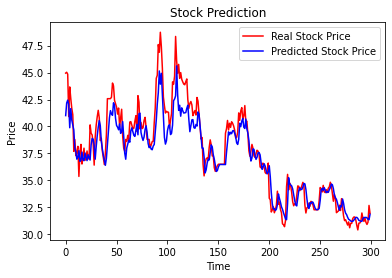

輸入變數維度 (439, 5, 1)
預測變數維度 (439,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.12535115]
 [0.12535115]
 [0.16489644]
 [0.20839627]
 [0.25622374]]
第Y個預測日之正規化股價
0.2264528597931733
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 5, 256)            264192    
_________________________________________________________________
dropout_30 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_31 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_32 (Dropout)     

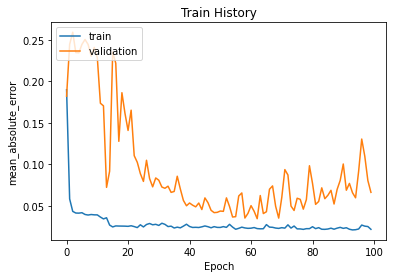

輸入變數維度 (300, 5, 1)
預測變數維度 (300,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.12638313]
 [0.11960443]
 [0.12455809]
 [0.11901786]
 [0.08665616]]
第Y個預測日之正規化股價
0.1091757382290312
10/10 [==============================] - 0s 11ms/step - loss: 0.0902 - mean_absolute_error: 0.0902


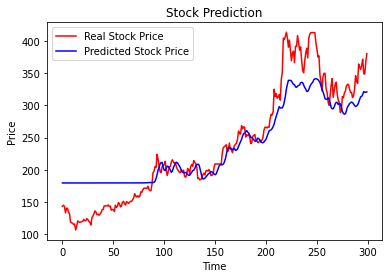

輸入變數維度 (439, 5, 1)
預測變數維度 (439,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.53307149]
 [0.53307149]
 [0.50082323]
 [0.55212724]
 [0.54186642]]
第Y個預測日之正規化股價
0.562387968746516
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_35 (LSTM)               (None, 5, 256)            264192    
_________________________________________________________________
dropout_35 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_36 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_36 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_37 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_37 (Dropout)      

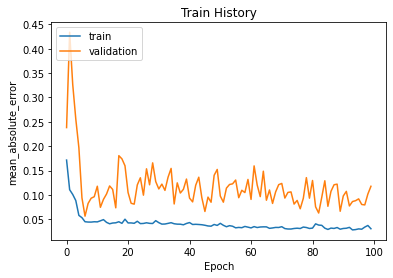

輸入變數維度 (300, 5, 1)
預測變數維度 (300,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.23866521]
 [0.21642768]
 [0.251594  ]
 [0.25314541]
 [0.19574165]]
第Y個預測日之正規化股價
0.2164276763970564
10/10 [==============================] - 0s 13ms/step - loss: 0.0726 - mean_absolute_error: 0.0726


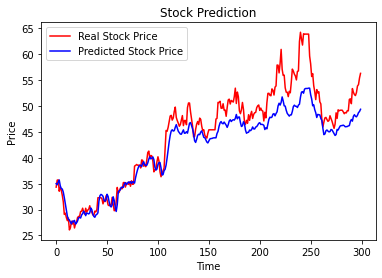

輸入變數維度 (439, 5, 1)
預測變數維度 (439,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.90605949]
 [0.91164058]
 [0.90047914]
 [0.89396836]
 [0.82049005]]
第Y個預測日之正規化股價
0.8195598109321887
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 5, 256)            264192    
_________________________________________________________________
dropout_40 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_41 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_41 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_42 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_42 (Dropout)     

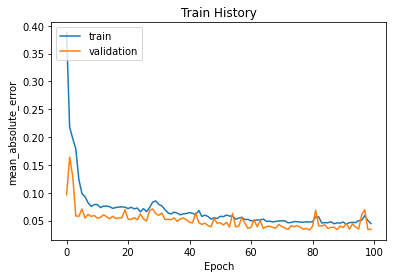

輸入變數維度 (300, 5, 1)
預測變數維度 (300,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.38972266]
 [0.39653011]
 [0.34292195]
 [0.3101614 ]
 [0.25400047]]
第Y個預測日之正規化股價
0.2722953526406112
10/10 [==============================] - 0s 11ms/step - loss: 0.0390 - mean_absolute_error: 0.0390


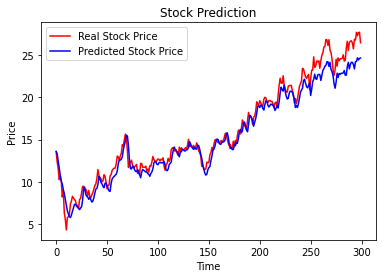

輸入變數維度 (439, 5, 1)
預測變數維度 (439,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.85764972]
 [0.83520992]
 [0.78690143]
 [0.78409674]
 [0.7485661 ]]
第Y個預測日之正規化股價
0.7370343611927272
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_45 (LSTM)               (None, 5, 256)            264192    
_________________________________________________________________
dropout_45 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_46 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_46 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_47 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_47 (Dropout)     

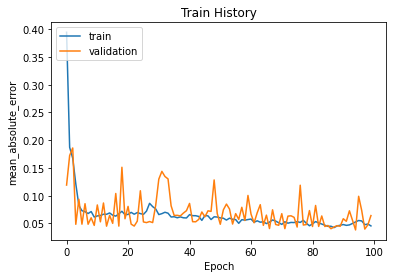

輸入變數維度 (300, 5, 1)
預測變數維度 (300,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.34078966]
 [0.37268166]
 [0.32222396]
 [0.29169871]
 [0.23987391]]
第Y個預測日之正規化股價
0.29181246376482906
10/10 [==============================] - 0s 12ms/step - loss: 0.0457 - mean_absolute_error: 0.0457


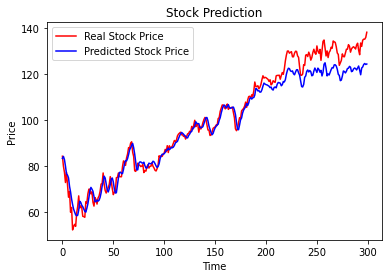

In [7]:
stock.shape
for i in range(stock.shape[1]-1):
  n= i+1
  stock_set = stock[stock.columns[n]] 

  #分割訓練資料與測試資料
  length = len(stock[stock.Date<'2020/03/04'])-ref_day #決定分割時間點，例如以2019-03-20之前ref_day天以前之有交易記錄的資料為training set
  train = stock_set[0:length] #決定資料分割時間點，例如以2021-01-31前ref_day天起為testing set
  test = stock_set[length:]

  #使用sklearn的preprocessing的MinMaxScaler進行正規化:(x-min)/(max-min)
  #執行正規化
  train = train.values.reshape(-1,1) #執行reshape，使其shape為(資料長度,1)
  scaler= preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(train)
  train_nom = scaler.transform(train) #執行正規化，使得特徵值範圍介於0~1

  X_train, Y_train = xy_set(train_nom, ref_day) #區分訓練資料之input variables與output variable
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # 轉成三維，以便符合keras recurrent之input_shape
  Y_train = np.squeeze(Y_train)
  print('輸入變數維度',X_train.shape)
  print('預測變數維度',Y_train.shape)
  print('第Y個被預測日之前ref_day天每天正規化股價')
  print(X_train[4])
  print('第Y個預測日之正規化股價')
  print(Y_train[4])

  model = Sequential()
  model.add(LSTM(units=256, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(Dropout(d))
  model.add(LSTM(units=256, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], dim)))
  model.add(Dropout(d))
  model.add(LSTM(units=256, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], dim)))
  model.add(Dropout(d))
  model.add(LSTM(units=256, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], dim)))
  model.add(Dropout(d))
  model.add(LSTM(units=256, activation="relu", return_sequences=False, input_shape=(X_train.shape[1], dim)))
  model.add(Dropout(d))  
  model.add(Dense(units=1))
      #model.compile(optimizer='adam', loss='mse')  # rmsprop
      #model.compile(loss="mean_squared_error", optimizer="adam",metrics=['mean_squared_error']) 
      # 屬迴歸分析，通常使用Mean Squared Error或Mean Absolute Error
  model.compile(loss="mean_absolute_error", optimizer="adam",metrics=['mean_absolute_error'])
  model.summary()
  train_history =model.fit(X_train, Y_train,batch_size=32,  
                         epochs=100,verbose=1,validation_split=0.2)
  
  show_train_history(train_history,'mean_absolute_error','val_mean_absolute_error')

  #分割訓練資料與測試資料
  length = len(stock[stock.Date<'2020/03/04'])-ref_day #決定分割時間點，例如以2021-01-31之前的ref_day天以後之有交易記錄的資料為testing set
  test = stock_set[length:]
  #執行正規化
  test = test.values.reshape(-1,1) #執行reshape，使其shape為(資料長度,1)
  test_scaler= preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(test)
  test_nom = test_scaler.transform(test) #執行正規化，使得特徵值範圍介於0~1

  X_test, Y_test = xy_set(test_nom, ref_day) #區分訓練資料之input variables與output variable
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # 轉成三維，以便符合keras recurrent之input_shape
  Y_test = np.squeeze(Y_test)
  print('輸入變數維度',X_test.shape)
  print('預測變數維度',Y_test.shape)
  print('第Y個被預測日之前ref_day天每天正規化股價')
  print(X_test[4])
  print('第Y個預測日之正規化股價')
  print(Y_test[4])

  scores = model.evaluate(X_test, Y_test, verbose=1) #使用model.evaluate進行模型評估，評估後的績效指標會儲存於scores
  scores[1] #傳回測試資料的mean_absolute_error

  Y_test_predict=model.predict(X_test) #測試資料預測結果
  Y_test_predict_price = test_scaler.inverse_transform(Y_test_predict) # 將正規化預測值轉換為股票價格

  X_test_real, Y_test_real = xy_set(test, ref_day) #取得測試資料之被預測日之真實股票價格
  show_test_result(Y_test_real,Y_test_predict_price) #結果若不錯，代表可以使用此模型預測某支股票的股價

  col= stock.columns[n] 
  result= pd.DataFrame(Y_test_predict_price, columns= [col])
  rdf= pd.concat([rdf, result], axis=1)


In [8]:
rdf

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,143.900726,114.500603,299.046814,110.324959,44.629520,41.010071,179.649307,35.014217,13.586861,83.213554
1,148.536316,115.027931,304.447083,108.993332,44.631626,42.180759,179.637436,34.785534,13.328561,84.083076
2,149.177841,115.873993,307.214752,108.067612,44.704914,42.443020,179.629166,35.317493,12.435044,82.689926
3,146.608109,116.246971,302.910156,107.158203,44.733974,42.045330,179.633530,35.719501,11.678064,79.822418
4,141.158310,114.905273,293.559296,104.178268,44.229710,39.885361,179.637070,34.605728,10.742152,76.486923
...,...,...,...,...,...,...,...,...,...,...
295,430.992188,108.088631,553.322021,106.278961,55.354267,31.576307,316.869141,47.904411,24.250214,123.061790
296,431.004822,106.796593,559.198364,104.313530,54.911171,31.527372,321.215637,48.211369,24.686880,124.154259
297,432.171295,106.056168,567.990845,103.667580,55.127731,31.395144,320.398315,48.704262,24.425009,124.558342
298,426.522247,105.888954,570.309265,103.239174,55.505112,31.353371,320.122467,48.928253,24.621414,124.141998


In [9]:
import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/LSTM預測結果')
print(os.getcwd() )#获取当前工作路径
timenow= time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()) 
type(timenow) #str

outstr= 'result'+ timenow + '.csv'
rdf.to_csv(outstr) #相对位置，保存在getwcd()获得的路径下

outstr

/content/gdrive/MyDrive/Colab Notebooks/LSTM預測結果


'result2021-05-13 09:56:34.csv'